<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Clustering_All_Clustering_on_sample_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning - Clustering

A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group.

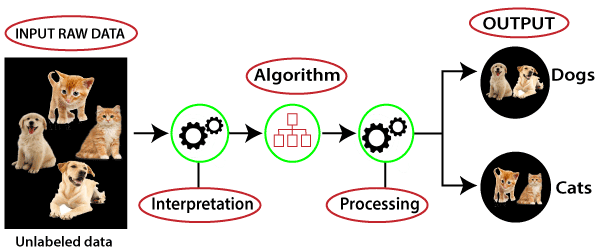

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("cluster_data.csv")

In [ ]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [ ]:
df.shape

(2300, 2)

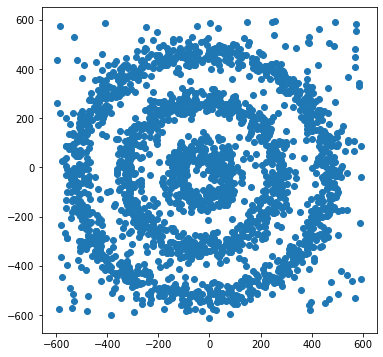

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["0"],df["1"])

## K-means Clsutering

### Elbow Method to find the k value 

In [ ]:
#kmeans
from sklearn.cluster import KMeans
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

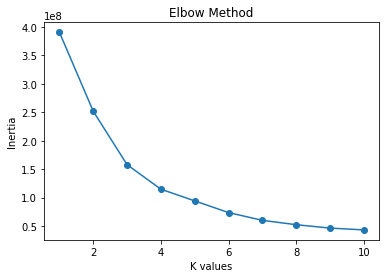

In [ ]:
plt.plot(k,ssd,marker='o')
plt.xlabel("K values")
plt.ylabel("Inertia")
plt.title("Elbow Method")

In [ ]:
#k =4
model=KMeans(n_clusters=4)
model.fit(df)
centroid=model.cluster_centers_

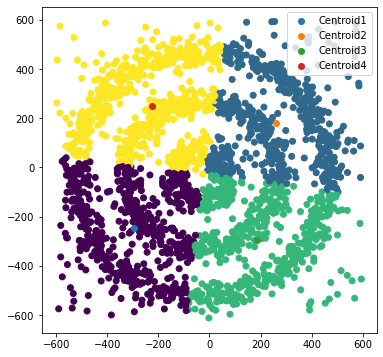

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["0"],df["1"],c=model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label="Centroid"+str(i+1))
plt.title("K-Means Clustering")
plt.legend()

## Hierarchical Agglomeritve Clustering

### dendrogram for no. of k

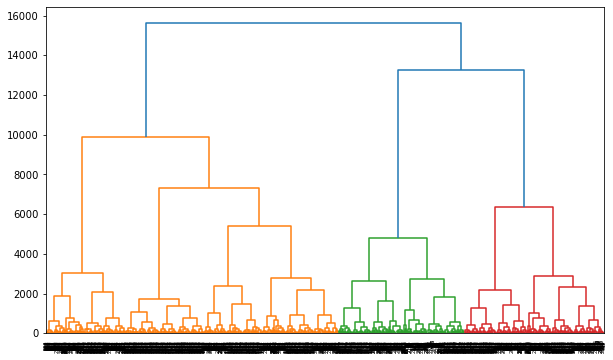

In [ ]:
#Hierarchical Agglomeritive clustering
#dendrogram for no. of k
plt.figure(figsize=(10,6))
from scipy.cluster import hierarchy
den=hierarchy.dendrogram(hierarchy.linkage(df,method="ward"))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3)
model.fit(df)

AgglomerativeClustering(n_clusters=3)

Text(0.5, 1.0, 'Hierarchical Agglomeritive clustering')

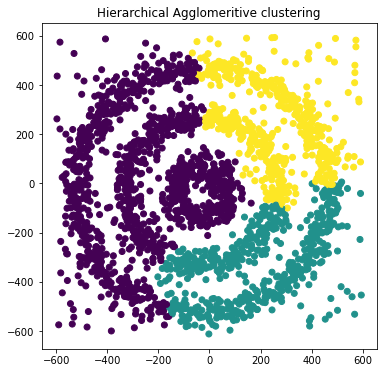

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["0"],df["1"],c=model.labels_)
plt.title("Hierarchical Agglomeritive clustering")

## DBSCAN


### K-distance graph

Text(0.5, 1.0, 'K-distance Graph')

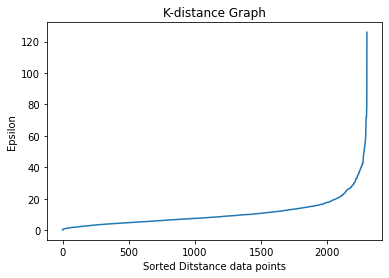

In [ ]:
#DBSCAN
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(df)
distance,_=n_fit.kneighbors(df)
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)
plt.xlabel("Sorted Ditstance data points")
plt.ylabel("Epsilon")
plt.title("K-distance Graph")

In [ ]:
#epsilon value is =30
#min sample =3

<function min>

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=30,min_samples=3)
model.fit(df)

DBSCAN(eps=30, min_samples=3)

Text(0.5, 1.0, 'DBSCAN clustering')

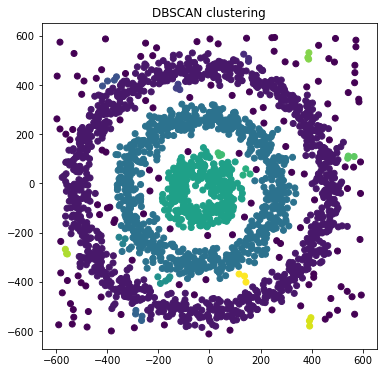

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["0"],df["1"],c=model.labels_)
plt.title("DBSCAN clustering")